In [1]:
import os
import sys
import pickle

import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

from config import RESULTS, FIGURES
from code_.tools.plotting_tools import *
from code_.model_activations.configs import analysis_cfg as cfg
from code_.model_activations.loading import load_full_identifier

In [2]:
DATASET = 'places_val'
NUM_COMPONENTS = 1000

In [8]:
# load expansion results
model_name = 'expansion'
identifier  = load_full_identifier(model_name=model_name, 
                                                                features=cfg['places_val']['models'][model_name]['features'], 
                                                                layers=cfg['places_val']['models'][model_name]['layers'], 
                                                                dataset=DATASET,
                                                                principal_components = NUM_COMPONENTS) 
with open(os.path.join(RESULTS, 'classification-' + identifier),'rb') as f:
    score_expansion_pcs = pickle.load(f)

# load alexnet results
model_name = 'alexnet_trained'
identifier = load_full_identifier(model_name=model_name, 
                                            features=cfg[DATASET]['models'][model_name]['features'], 
                                            layers=cfg[DATASET]['models'][model_name]['layers'], 
                                            dataset=DATASET,
                                            principal_components = NUM_COMPONENTS)
with open(os.path.join(RESULTS, 'classification-' + identifier),'rb') as f:
    score_alexnet_pcs = pickle.load(f)

/tmp/ipykernel_607233/551718533.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette=palette, width=0.5, dodge=False, ax=ax1)


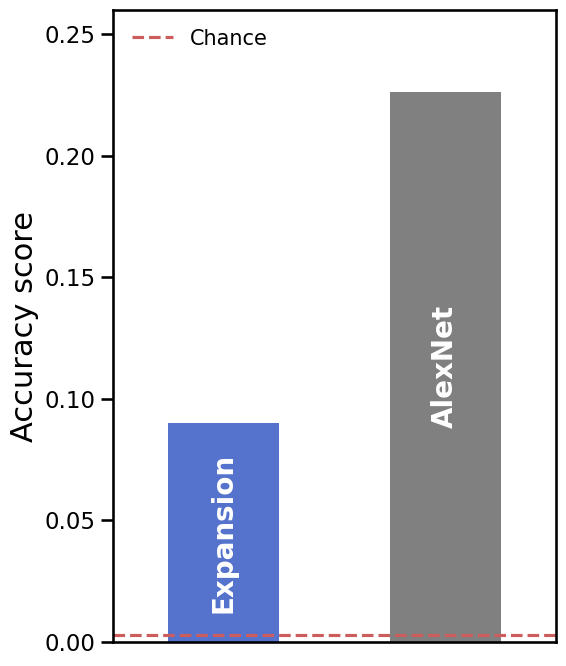

In [9]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

palette = {'Expansion':'royalblue','AlexNet':'gray'}
scores = [score_expansion_pcs, score_alexnet_pcs]
labels = ['Expansion','AlexNet']

sns.set_context('talk')
plt.rcParams['figure.figsize'] = (6,7)

fig, ax1 = plt.subplots()

# draw bars
sns.barplot(x=labels, y=scores, palette=palette, width=0.5, dodge=False, ax=ax1)
plt.axhline(y=1/365, color='indianred', linestyle='--', label='Chance')

# remove default x-ticks & legend
ax1.set_xticks([])
ax1.legend(frameon=False, fontsize=15, loc='upper left')
plt.ylim(0,0.26)
plt.ylabel('Accuracy score', size=22)

# manually annotate each bar with vertical, bold white text
bars = ax1.patches[:len(labels)]
for bar, label in zip(bars, labels):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() / 2
    ax1.text(
        x, y, label,
        ha='center', va='center',
        color='white',
        rotation=90,        # vertical
        fontweight='bold',
        fontsize=20
    )

plt.tight_layout()
plt.savefig(os.path.join(FIGURES, 'figure_6.png'), dpi=200)
plt.show()
